In [72]:
!pip install --upgrade seaborn statsmodels
import os
!pip3 install tensorflow

# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [73]:
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

# Cambiar al directorio donde se encuentra el dataset
dataset_path = '/content/drive/My Drive/ESPECIALITZACIÓ/IA/PROYECTOS/Proyecto2/Elementos'
os.listdir(dataset_path)  # Verifica los archivos en el directorio

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['readme.md',
 'Lexique - Data Analyst.xlsx',
 'extract - cash request - data analyst.csv',
 'extract - fees - data analyst - .csv',
 'extract - cash request - data analyst.gsheet',
 'extract - fees - data analyst - .gsheet']

## **Selector del JOIN (INNER)**

In [74]:
# Cargar el dataset principal de solicitudes de adelanto en efectivo
cash_request = pd.read_csv('/content/drive/MyDrive/ESPECIALITZACIÓ/IA/PROYECTOS/Proyecto2/Elementos/extract - cash request - data analyst.csv')
# Separacion de los dataset
df1 = pd.read_csv(os.path.join(dataset_path, 'extract - cash request - data analyst.csv'))
df2 = pd.read_csv(os.path.join(dataset_path, 'extract - fees - data analyst - .csv'))

In [78]:
df_unido = pd.merge(df1, df2, left_on=['id'], right_on=['cash_request_id'], how='left')
print(df_unido)

        id_x  amount           status_x                   created_at_x  \
0          5   100.0           rejected  2019-12-10 19:05:21.596873+00   
1         70   100.0           rejected   2019-12-10 19:50:12.34778+00   
2          7   100.0           rejected   2019-12-10 19:13:35.82546+00   
3         10    99.0           rejected  2019-12-10 19:16:10.880172+00   
4       1594   100.0           rejected  2020-05-06 09:59:38.877376+00   
...      ...     ...                ...                            ...   
32089  22357   100.0         money_back  2020-10-20 07:58:04.006937+00   
32090  20256   100.0         money_back  2020-10-10 05:40:55.700422+00   
32091  20256   100.0         money_back  2020-10-10 05:40:55.700422+00   
32092  19886   100.0  direct_debit_sent  2020-10-08 14:16:52.155661+00   
32093  19886   100.0  direct_debit_sent  2020-10-08 14:16:52.155661+00   

                        updated_at_x  user_id                   moderated_at  \
0       2019-12-11 16:47:42.407

In [80]:
df_unido['created_at_x'].max()

'2020-11-01 23:42:30.847066+00'

In [81]:
# Inspeccionar la estructura y el tipo de datos de 'cash_request'
data = df_unido
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_x                        32094 non-null  int64  
 1   amount                      32094 non-null  float64
 2   status_x                    32094 non-null  object 
 3   created_at_x                32094 non-null  object 
 4   updated_at_x                32094 non-null  object 
 5   user_id                     29522 non-null  float64
 6   moderated_at                21759 non-null  object 
 7   deleted_account_id          2573 non-null   float64
 8   reimbursement_date          32094 non-null  object 
 9   cash_request_received_date  24149 non-null  object 
 10  money_back_date             23917 non-null  object 
 11  transfer_type               32094 non-null  object 
 12  send_at                     22678 non-null  object 
 13  recovery_status             720

In [82]:
cash_request=pd.read_csv('/content/drive/MyDrive/ESPECIALITZACIÓ/IA/PROYECTOS/Proyecto2/Elementos/extract - cash request - data analyst.csv')
fees=pd.read_csv('/content/drive/MyDrive/ESPECIALITZACIÓ/IA/PROYECTOS/Proyecto2/Elementos/extract - fees - data analyst - .csv')

In [83]:
plt.figure(figsize=(10, 8))
fig1 = px.imshow(df_unido.isnull(),
 color_continuous_scale=['black', 'red'],
 labels=dict(color="NaN"),
 title="Mapa de calor para df_unido")
fig1.update_layout(width=700, height=700)
fig1.update_coloraxes(showscale=False)
fig1.show()

Output hidden; open in https://colab.research.google.com to view.

In [84]:
df_unido.describe()

id_x        amount        user_id  deleted_account_id  \
count  32094.000000  32094.000000   29522.000000         2573.000000   
mean   13822.217424     83.516514   31936.772576        10978.060241   
std     7416.239319     25.900244   26401.062842         8305.770856   
min        3.000000      1.000000      34.000000           91.000000   
25%     7800.000000     50.000000   11499.000000         4071.000000   
50%    14115.000000    100.000000   23823.000000         7652.000000   
75%    19936.000000    100.000000   45419.000000        19540.000000   
max    27010.000000    200.000000  103719.000000        30445.000000   

               id_y  cash_request_id  total_amount  
count  21057.000000     21057.000000  21057.000000  
mean   10646.670228     16318.449162      5.000237  
std     6099.136169      6656.149949      0.034457  
min        1.000000      1456.000000      5.000000  
25%     5388.000000     11745.000000      5.000000  
50%    10654.000000     17160.000000      5.000000  
75%    15926.000000     21796.000000      5.000000  
max    21193.000000     27010.000000     10.000000

In [85]:
df_unido['created_at_x'].min()

'2019-11-19 13:57:53.511561+00'

In [86]:
 df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_x                        32094 non-null  int64  
 1   amount                      32094 non-null  float64
 2   status_x                    32094 non-null  object 
 3   created_at_x                32094 non-null  object 
 4   updated_at_x                32094 non-null  object 
 5   user_id                     29522 non-null  float64
 6   moderated_at                21759 non-null  object 
 7   deleted_account_id          2573 non-null   float64
 8   reimbursement_date          32094 non-null  object 
 9   cash_request_received_date  24149 non-null  object 
 10  money_back_date             23917 non-null  object 
 11  transfer_type               32094 non-null  object 
 12  send_at                     22678 non-null  object 
 13  recovery_status             720

# **Revisión de columnas con valores clave**

In [87]:
columnas_df_unido=df_unido.columns.tolist()
for i in columnas_df_unido:
  print("===========================")
  print(f"{df_unido[i].value_counts().head(10)}")

id_x
12225    35
5006     28
4410     24
12452    23
11376    21
2358     19
11746    17
15319    16
11968    15
11585    15
Name: count, dtype: int64
amount
100.0    21983
50.0      7047
25.0      1438
80.0       323
60.0       249
70.0       182
20.0       168
30.0       157
40.0       144
90.0       114
Name: count, dtype: int64
status_x
money_back               23270
rejected                  6568
direct_debit_rejected     1941
active                     158
direct_debit_sent           74
transaction_declined        48
canceled                    35
Name: count, dtype: int64
created_at_x
2020-08-12 15:38:54.26217+00     35
2020-06-24 16:13:39.243922+00    28
2020-06-20 17:40:40.07004+00     24
2020-08-14 09:16:15.702093+00    23
2020-08-07 14:11:38.2624+00      21
2020-05-30 12:33:57.977286+00    19
2020-08-10 14:45:11.12925+00     17
2020-09-09 11:02:32.494801+00    16
2020-08-11 12:27:47.272892+00    15
2020-08-09 20:34:41.249375+00    15
Name: count, dtype: int64
updated_at_x
20

# **Visualización de distribuciones de datos**

In [88]:
columnas_numericas_df_unido=df_unido.describe().columns.tolist()
for c in columnas_numericas_df_unido:
  fig = px.histogram(df_unido, x=c, title=f'Histograma de {c}')
  fig.update_layout(height=500)
  fig.show()

In [89]:
for c in columnas_df_unido:
 if c not in columnas_numericas_df_unido:
  counts = df_unido[c].value_counts()
  if len(counts)<=10:
    fig = px.pie(names=counts.index, values=counts.values, title=f'Distribución de {c}')
    fig.update_layout(height=500)
    fig.show()

# **Identificación de valores atípicos**

In [90]:
for c in columnas_numericas_df_unido:
 fig = px.box(df_unido, y=c, title=f'Boxplot de {c}')
 fig.update_layout(height=500)
 fig.show()

## **Grafica de violin Cash Request**

In [91]:
for c in columnas_numericas_df_unido:
 fig = px.violin(df_unido, y=c, title=f'Violinplot de {c}')
 fig.update_layout(height=500)
 fig.show()

# **Obtener gráficos de dispersión**

In [92]:
# Genera gráficos de dispersión para todas las combinaciones de columnas numéricas
for c1, c2 in itertools.combinations(columnas_numericas_df_unido, 2):
  fig = px.scatter(df_unido, x=c1, y=c2, title=f'Gráfico de dispersión de {c1} vs {c2}')
  fig.update_layout(height=500)
  fig.show()

Output hidden; open in https://colab.research.google.com to view.

# **Obtener gráficos de dispersión con línea de regresión (Tendencia)**

In [93]:
# Genera gráficos de dispersión con línea de tendencia para todas las combinaciones de columnas numéricas
for c1, c2 in itertools.combinations(columnas_numericas_df_unido, 2):
 fig = px.scatter(df_unido, x=c1, y=c2,
  title=f'Gráfico de dispersión de {c1} vs {c2} con línea de tendencia', trendline="ols") # Agregar línea de tendencia (OLS)
 # Cambiar el color de la línea de tendencia a rojo
 fig.update_traces(line=dict(color='red', width=3)) # Color y ancho de la línea de tendencia
 fig.update_traces(line=dict(color='red'), selector=dict(mode='lines')) # Cambiar el color de la línea de tendencia
 fig.update_layout(height=500)
 fig.show()

Output hidden; open in https://colab.research.google.com to view.

# **Obtencón de graficos en descomposición de serie temporal**

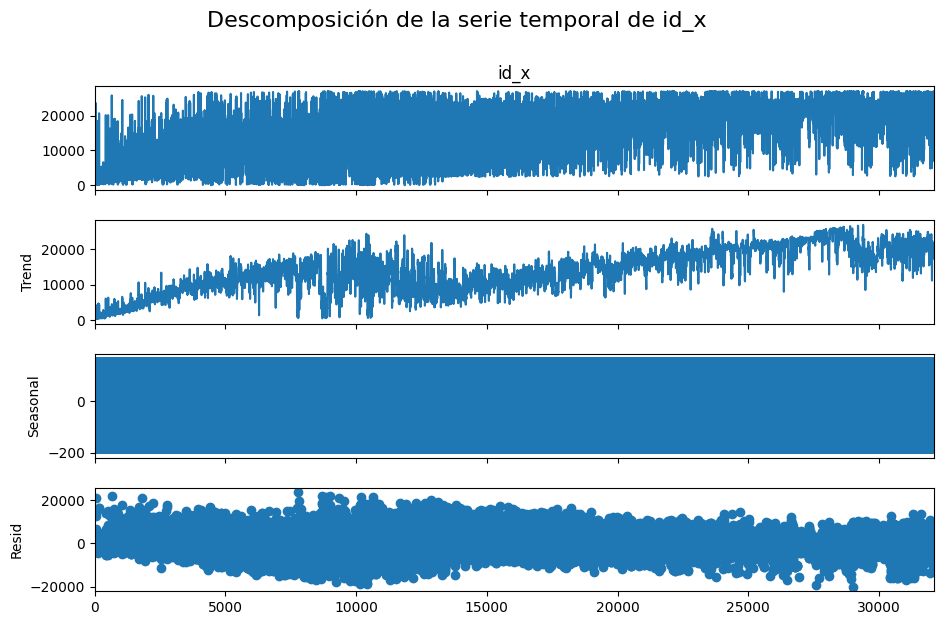

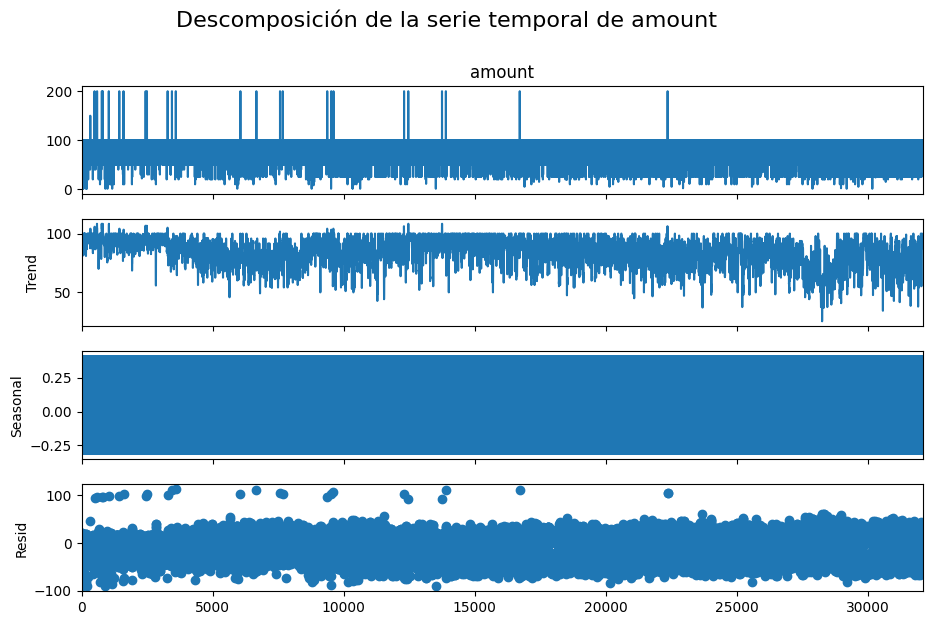

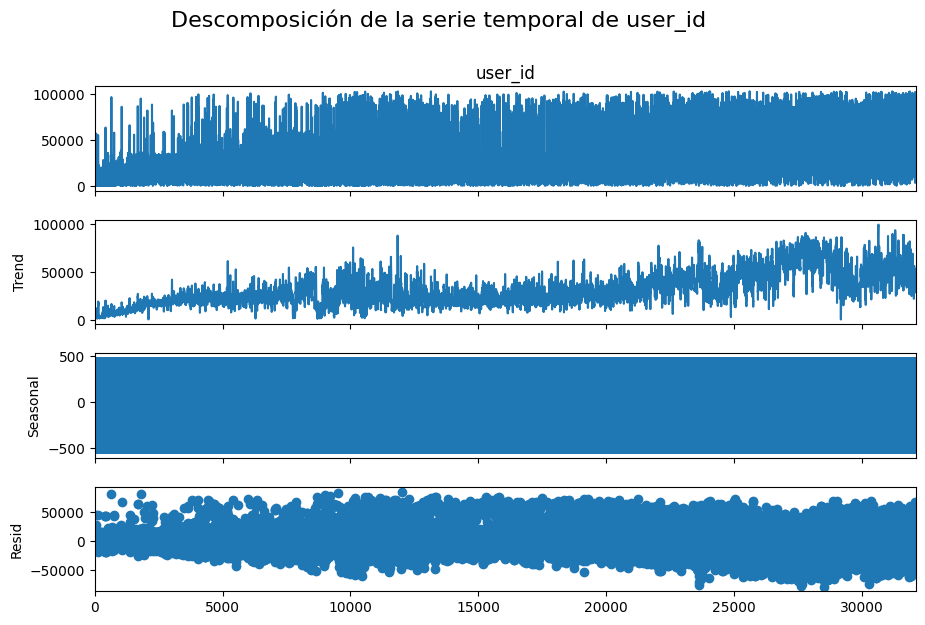

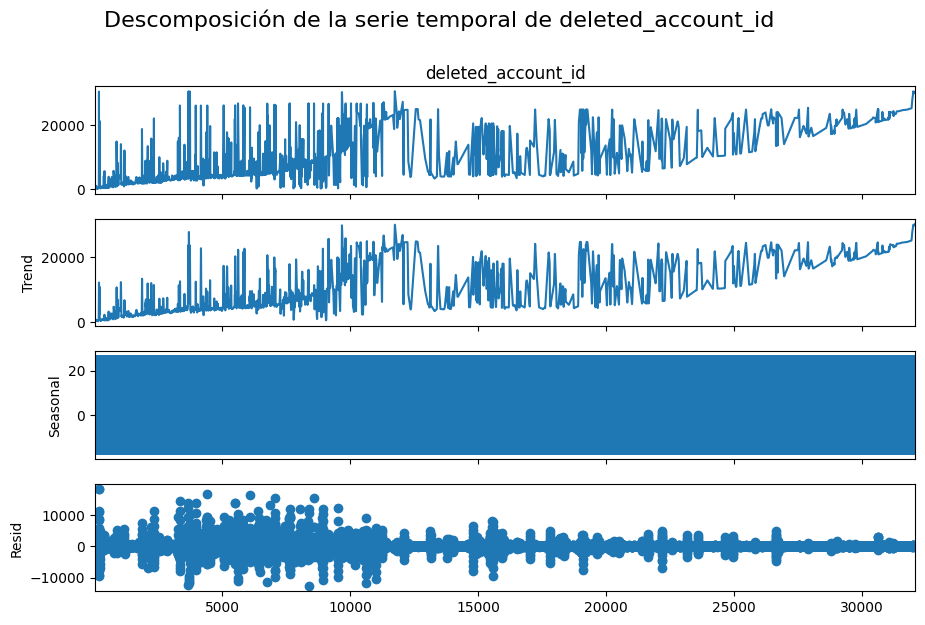

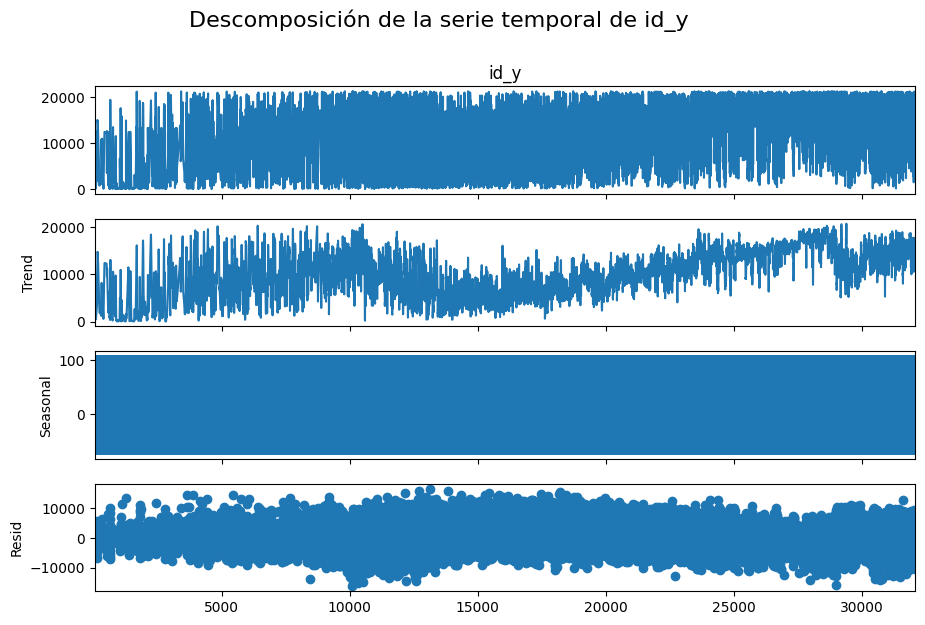

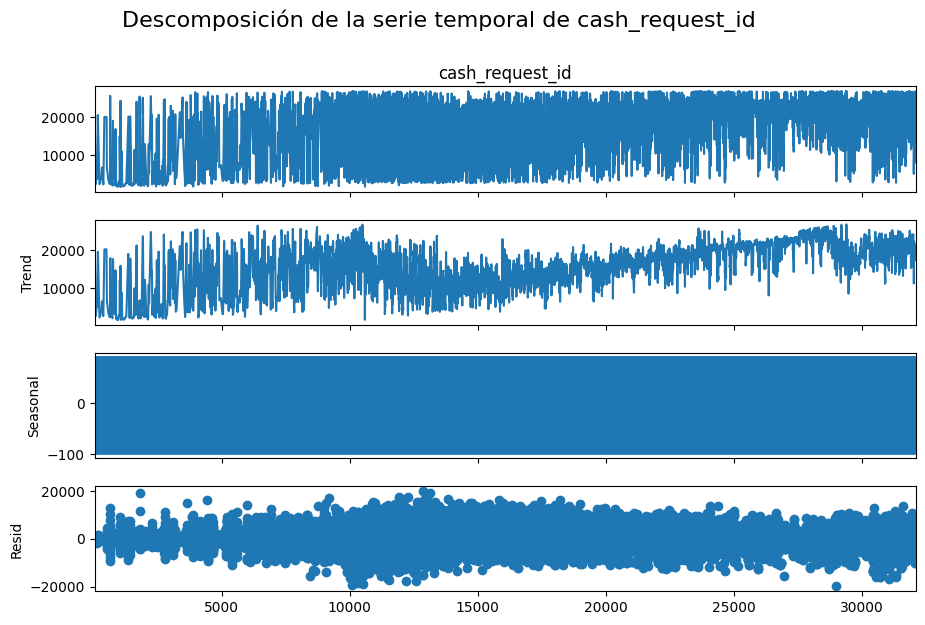

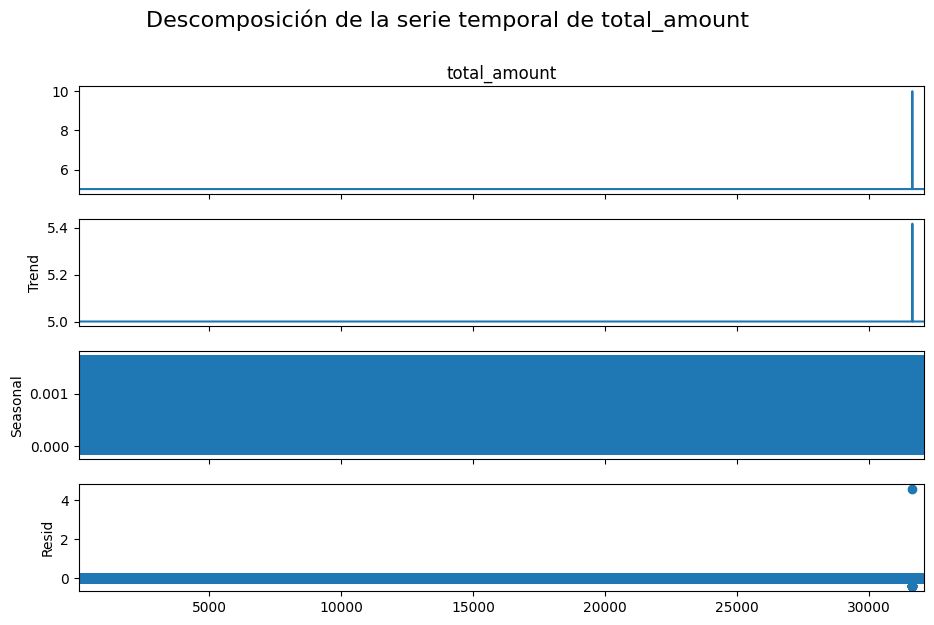

In [94]:
# Descomposición de series temporales para cada columna numérica individual
for c in columnas_numericas_df_unido:
 # Crear una copia del DataFrame para trabajar
 df_unido_copy = df_unido[c].copy()
 # Verifica si hay valores faltantes y elimínalos o interpola
 if df_unido_copy.isnull().any():
  df_unido_copy = df_unido_copy.interpolate() # Rellenar NaN con interpolación
 # Eliminar filas con valores faltantes
 df_unido_copy = df_unido_copy.dropna()
 # Verificar que no hay valores no finitos
 if not np.isfinite(df_unido_copy).all():
  print(f'La columna {c} contiene valores no finitos, se omite la descomposición.')
  continue
 # Descomposición de la serie temporal
 descomposicion = seasonal_decompose(df_unido_copy, model='additive', period=12)
 # Graficar la descomposición
 fig = descomposicion.plot()
 # Ajustar el tamaño de la figura con matplotlib

 plt.gcf().set_size_inches(10, 6)
 # Ajustar el título para que no se superponga
 fig.suptitle(f'Descomposición de la serie temporal de {c}', fontsize=16, y=1.05)
 plt.show()